In [ ]:
"""
oja generlaizada, y sanger matricial

tenemos que is o si normalizar los datos, ya que quedan cnetrados ne 0
pr ocnsiguiente NO ES BUENO tener unidad umbral

es importante centrar lso datos, proque SIEMPRE la primer coponente es la varianza respecto del origen

alguna condicion de parada
"""

'\noja generlaizada, y sanger matricial\n\ntenemos que is o si normalizar los datos, ya que quedan cnetrados ne 0\npr ocnsiguiente NO ES BUENO tener unidad umbral\n\nes importante centrar lso datos, proque SIEMPRE la primer coponente es la varianza respecto del origen\n\nalguna condicion de parada\n'

In [ ]:
#operaciones matriciales para el aprendizaje HebianoNoSuperv, oja gral, sanger

"""
usemos N=5 , M=3
x(1,N)
w(N,M)
d_w(N,M)

con y(1,M) = np.dot(x,w)

aca z-->EBE

entocnes...

d_w = np.dot( (x-z).T , y)#devuelve matriz , simil np.outer( (x-z) , y)

w = w+eta*d_w
"""

'\nusemos N=5 , M=3\nx(1,N)\nw(N,M)\nd_w(N,M)\n\ncon y(1,M) = np.dot(x,w)\n\naca z-->EBE\n\nentocnes...\n\nd_w = np.dot( (x-z).T , y)#devuelve matriz , simil np.outer( (x-z) , y)\n\nw = w+eta*d_w\n'

In [ ]:
#oja gral...
import numpy as np

def OjaGral(dataset , dim_final , eta = 0.001):

    x = np.zeros((1,dataset.shape[1]))

    #w = np.zeros((dataset.shape[1] , dim_final))

    d_w = np.zeros((dataset.shape[1] , dim_final))


    w = np.random.uniform(-0.1 , 0.1,size=(dataset.shape[1] , dim_final))

    y = np.zeros((x.shape[1] , dim_final))

    for k in range(0 , dataset.shape[0]):

        x[:] = dataset[k , :]

        y[:] = np.dot(x , w)

        #hay que generar el z

        z = np.dot(y , w.T)

        #d_w = np.outer( (x-z) , y)

        d_w = np.dot( (x-z).T , y )#elijo creer que aca lo arregle

        #print(x.shape, z.shape , w.shape , d_w.shape)

        w = w + eta*d_w

    return(w)

In [ ]:
#chequiemos
import numpy as np

a = np.zeros((100 , 6))

for columna in range(0 , 6):

    for fila in range(0 , 100):

        a[fila,columna] = np.random.uniform(-(columna+1) , columna+1)

print(a[:5])

oja_prueba = OjaGral(a , 3)

print(oja_prueba)

[[-0.4949932  -1.10845881 -2.92813644 -3.38761335  1.54810986  5.53258419]
 [-0.99763252 -0.83493021  0.28674381  2.82636184 -0.40178708  3.66731174]
 [-0.68615069 -1.87905719 -1.22554332 -1.17576003 -0.67073199  4.11546169]
 [-0.32024542 -0.99790408  0.44042203 -1.18041038  4.8201244   3.24235244]
 [ 0.50130154  0.83149037  1.41118387 -3.70512631  4.36235131 -2.47422072]]
[[-0.01582634 -0.01128203  0.01122045]
 [-0.06554403  0.0257167  -0.06046405]
 [ 0.07140948  0.09599317 -0.13464073]
 [ 0.78484458 -0.42302204  0.22745763]
 [ 0.16803705  0.6782824   0.72225953]
 [ 0.46409823  0.58425048 -0.6494254 ]]


In [ ]:
np.dot(oja_prueba , oja_prueba.T)# haciendo pesos dot pesos_trapuesto, deberia dar simil identidad

array([[ 5.03655611e-04,  6.87516634e-05, -3.72387760e-03,
        -5.09649247e-03, -2.20773721e-03, -2.12233503e-02],
       [ 6.87516634e-05,  8.61326924e-03,  5.92908615e-03,
        -7.60736128e-02, -3.72413772e-02,  2.38730176e-02],
       [-3.72387760e-03,  5.92908615e-03,  3.24421282e-02,
        -1.51869410e-02, -2.01356358e-02,  1.76664179e-01],
       [-5.09649247e-03, -7.60736128e-02, -1.51869410e-02,
         8.46665630e-01,  9.23800389e-03, -3.06226190e-02],
       [-2.20773721e-03, -3.72413772e-02, -2.01356358e-02,
         9.23800389e-03,  1.00996228e+00,  5.21883038e-03],
       [-2.12233503e-02,  2.38730176e-02,  1.76664179e-01,
        -3.06226190e-02,  5.21883038e-03,  9.78489150e-01]])

In [ ]:
"""
si llamo falsa_identidad = np.dot(oja_prueba , oja_prueba.T)

entonces, el criterio de parada deberia ser algo del estilo norma(identidad-falsa_identidad)

la gracia es que esta norma tienda a 0
"""

def norma(falsa_identidad):

    """
    falsa_identidad es le producto de aplicar np.dot( OjaGral(dataset) , OjaGral(dataset).T )
    """

    identidad = np.identity(falsa_identidad.shape[0])

    return(np.linalg.norm(falsa_identidad - identidad))


#emtpmces ahora podemos escribir la func con criterio de parada

def OjaGral_Criteriosa(dataset , dim_final , eta = 0.001 , criterio = 0.01):

    x = np.zeros((1,dataset.shape[1]))

    #w = np.zeros((dataset.shape[1] , dim_final))

    d_w = np.zeros((dataset.shape[1] , dim_final))


    w = np.random.uniform(-0.1 , 0.1,size=(dataset.shape[1] , dim_final))

    y = np.zeros((x.shape[1] , dim_final))

    k = 0

    valor_norma = 1000

    while (k < dataset.shape[0] and norma(np.dot(w , w.T)) < criterio):

        x[:] = dataset[k , :]

        y[:] = np.dot(x , w)

        #hay que generar el z

        z = np.dot(y , w.T)

        #d_w = np.outer( (x-z) , y)

        d_w = np.dot( (x-z).T , y )#elijo creer que aca lo arregle

        #print(x.shape, z.shape , w.shape , d_w.shape)

        w = w + eta*d_w

        k = k+1

    return(w)

    OjaGral_Criteriosa(a)

In [ ]:
"""
sanger matricial

d_w_i_j = np.dot( (x-z),y_j )

con z np.sum(y_k * w_i_k)

d_w_i_j = (x-np.sum(y_k*w_i_k))*y_j

triangular de unos superior
prodcutos falopa, llegar
"""

#esto claramente no est'a chequeado, pero elijo creer, xq segui los pasos de la guia... solo le falta tener criterio de parada

import numpy as np

def Sanger(dataset , dim_final , eta = 0.001):

    diag = np.triu( np.ones((dim_final,dim_final)))

    x = np.zeros((1,dataset.shape[1]))

    d_w = np.zeros((dataset.shape[1] , dim_final))

    w = np.random.uniform(-0.1 , 0.1,size=(dataset.shape[1] , dim_final))

    y = np.zeros((x.shape[0] , dim_final))

    for k in range(0 , dataset.shape[0]):

        x[:] = dataset[k , :]

        y[:] = np.dot(x , w)

        #print(f'x: {x.shape}, y:{y.shape} , w: {w.shape} , d_w: {d_w.shape}')

        #hay que generar el z

        z = np.dot(w , (y.T*diag))#no le gusta este paso, #w.T deberia andar, y no

        d_w = (x.T-z) * y#elijo creer que esto ande

        #print(x.shape, z.shape , w.shape , d_w.shape)

        w = w + eta*d_w

    return(w)

In [ ]:
"""
criterio de parada...

charan, charan!!!

buscar ortogonalidad entre pesos, particularmente ortonormales
"""
import numpy as np

def norma(falsa_identidad):

    """
    falsa_identidad es le producto de aplicar np.dot( OjaGral(dataset) , OjaGral(dataset).T )
    """

    identidad = np.identity(falsa_identidad.shape[0])

    return(np.linalg.norm(falsa_identidad - identidad))

#sanger_criterioso

#sinchequear, solo elijo creer, es un salto de fe, no quedemos anemicos


def Sanger_Criterioso(dataset , dim_final , eta = 0.001 , criterio = 0.01):

    diag = np.triu( np.ones((dim_final,dim_final)))

    x = np.zeros((1,dataset.shape[1]))

    d_w = np.zeros((dataset.shape[1] , dim_final))

    w = np.random.uniform(-0.1 , 0.1,size=(dataset.shape[1] , dim_final))

    y = np.zeros((x.shape[0] , dim_final))#aca el shape de x lo dudo

    k = 0

    while (k < dataset.shape[0] and norma(np.dot(w , w.T)) < criterio):

        x[:] = dataset[k , :]

        y[:] = np.dot(x , w)

        #hay que generar el z

        z = np.dot(w, y.T*diag)

        d_w = (x.T-z) * y

        w = w + eta*d_w

        k = k+1

    return(w)

In [ ]:
'''
Para hacer pruebitas, hago una matriz correlacionada columna a columna va creciendo

con algun grado de estocasticidad, que rompe todo
'''
import numpy as np
import matplotlib.pyplot as plt

mat = np.random.uniform(0 , 0.2 , (1000,6)) * (np.arange(1,7).reshape(-1,6)*12)

print(mat.shape , '\n' , mat[:10,:])

(1000, 6) 
 [[ 0.70424008  2.7592049   3.36233747  2.16813555  0.94994066 14.14614917]
 [ 2.33495046  1.61710157  0.08940735  4.54133602  3.34798986  8.38723605]
 [ 1.2756033   1.4535339   5.62755623  1.71759153 10.10913698 11.61996922]
 [ 1.7346921   1.113018    4.15568557  6.45287843 10.68807703 14.10847324]
 [ 1.4522209   2.90901259  1.03886933  9.3329184   8.25464929 13.92112251]
 [ 0.10689113  0.62493905  5.08704052  5.60648745  5.90358322  2.37640071]
 [ 0.9795602   2.65379362  4.25083591  6.24935272  7.11480428  9.94852891]
 [ 1.19174714  1.26210587  3.84556457  7.84490018  0.4749835  14.36699579]
 [ 0.62889287  0.96771719  1.09777316  3.38141147  3.09937931  3.56746984]
 [ 1.88826941  2.36889739  6.23263603  5.97049406  7.19341996  3.56463441]]


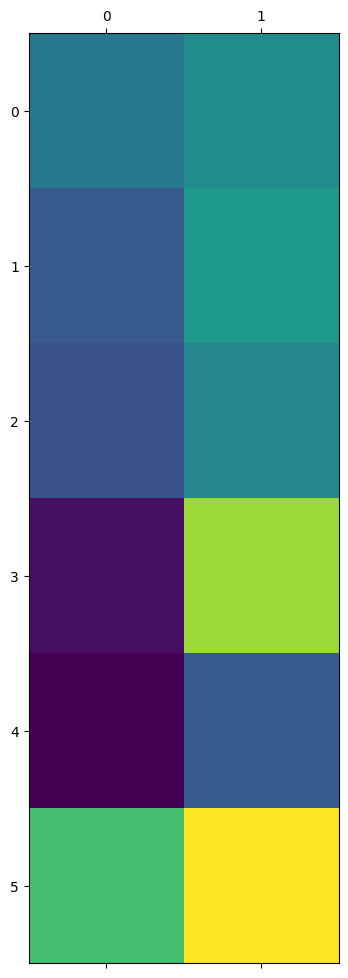

In [ ]:
#vamo a probar que las funciones anden...
#pasemosle mat, y reducir la dimencionalidad a 2

plt.matshow(OjaGral(mat , 2))

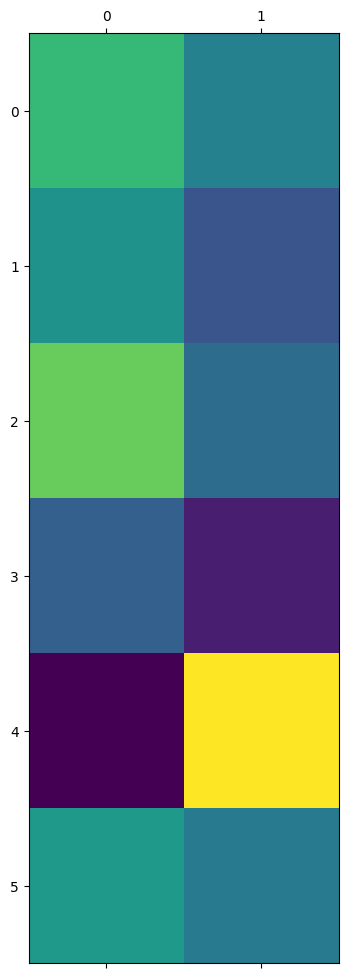

In [ ]:
plt.matshow(OjaGral_Criteriosa(mat , 2))

x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , d_w: (6, 2)
x: (1, 6), y:(1, 2) , w: (6, 2) , 

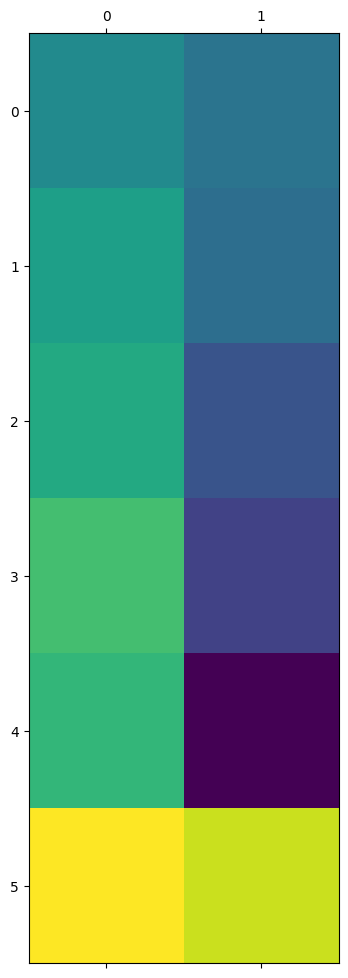

In [ ]:
###sanger

plt.matshow(Sanger(mat, 2))

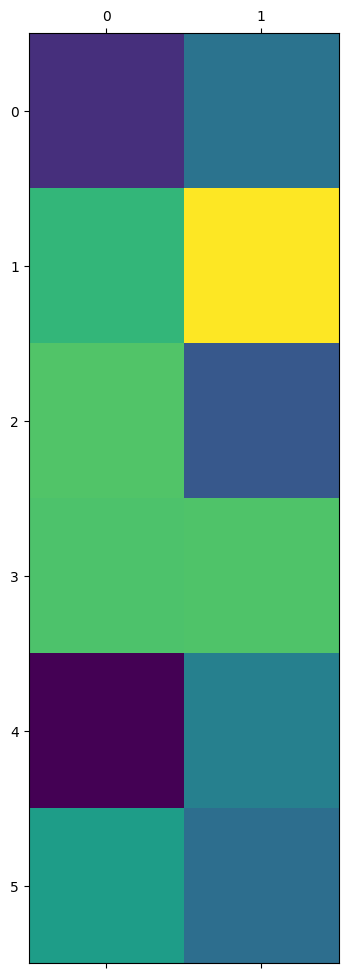

In [ ]:
####3sanger criterioso

plt.matshow(Sanger_Criterioso(mat, 2))